In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv


In [2]:
#Importing Necessary Libraries

'''Operating System Functionality'''
import os

'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv


In [4]:
#Loading data into a dataframe
data = pd.read_csv("/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [5]:
#Displaying the first 5 rows of the dataset
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [6]:
data.drop(['objid', 'specobjid'], axis=1, inplace=True)

In [7]:
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [9]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

In [10]:
X=data.drop('class', axis=1)
y=data['class']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [12]:
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

<Axes: xlabel='class', ylabel='count'>

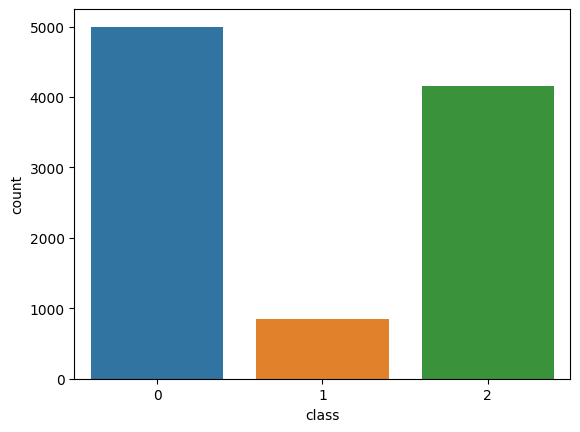

In [14]:
sns.countplot(x=data['class'])

In [15]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

In [16]:
dtClassifer.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15)

In [17]:
y_preds = dtClassifer.predict(X_test)

In [18]:
print(y_preds[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


In [19]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000


